# Effects of Loan Characteristics on Borrower's APR 
## by (Lizz Mwangi)

## Investigation Overview

The investigation here is aimed at showing how some loan features have an effect on the Borrower's APR. The focus is on Loan Original Amount, Employment Status and Prosper Rating.


## Dataset Overview

The data contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
I used a subset of the data with a few variables in my analysis. The major alteration to the data set was merging CreditGrade and ProsperRating (Alpha) columns into one, ProsperRating, since they had similar values

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
#subset the dataframe by selecting features of interest
cols = ['CreditGrade', 'BorrowerAPR', 'StatedMonthlyIncome','IsBorrowerHomeowner', 'IncomeRange', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'LP_NetPrincipalLoss', 'Term', 'EstimatedReturn', 'LoanStatus', 'LoanOriginalAmount']
df_sub = df[cols]

In [4]:
#Data Wrangling
#remove the rows with missing BorrowerAPR values
df_sub.dropna(subset = ['BorrowerAPR'], inplace=True)
#Merge CreditGrade and ProsperRating (Alpha) columns into one since they have have similar values then drop them

#replace NaNs in the two columns with spaces
df_sub['CreditGrade'] = df_sub['CreditGrade'].fillna(' ')
df_sub['ProsperRating (Alpha)'] = df_sub['ProsperRating (Alpha)'].fillna(' ')

#concatenate the two columns
df_sub['ProsperRating'] = (df_sub['CreditGrade'] + df_sub['ProsperRating (Alpha)']).str.strip()


In [5]:
#drop CreditGrade and ProsperRating (Alpha) columns using drop method
df_sub.drop(columns=['CreditGrade', 'ProsperRating (Alpha)'], inplace=True)

#replace empty strings with np.nan objects
df_sub['ProsperRating'].replace('', np.nan, inplace=True)
#drop the rows with nan values
df_sub.dropna(subset=['ProsperRating'], inplace=True)


#drop rows with NC in the ProsperRating column
df_sub.drop(index=df_sub[df_sub['ProsperRating'] == 'NC'].index, inplace=True)
df_sub['ProsperRating'].value_counts()

C     23991
B     19968
D     19426
A     17865
E     13083
HR    10441
AA     8867
Name: ProsperRating, dtype: int64

In [6]:
# convert ProsperRating and EmploymenStatus into ordered categorical types
cat_var_dict = {'ProsperRating': ['AA','A','B','C','D','E', 'HR'],
                'EmploymentStatus': ['Employed','Full-time', 'Self-employed', 'Part-time', 'Retired ', 'Not employed', 'Not available', 'Other' ]}

for var in cat_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = cat_var_dict[var])
    df_sub[var] = df_sub[var].astype(ordered_var)

#declaring the numerical and categorical variables
numeric_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LP_NetPrincipalLoss', 'Term', 'LoanOriginalAmount']
categoric_vars = ['ProsperRating', 'EmploymentStatus']

## Distribution of Borrower APR

The distribution of the borrower APR's looks multimodal with several peaks. There is also a peculiar peak between 0.3 and 0.4


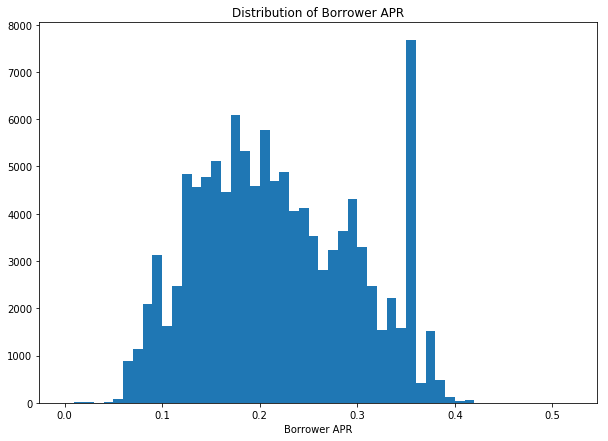

In [7]:
#plot BorrowerAPR on a standard scale
binsize = 0.01
bins = np.arange(0, df_sub['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[10, 7])
plt.hist(data = df_sub, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.title('Distribution of Borrower APR');
plt.show()

## Relationship between BorrowerAPR, LoanOriginalAmount, Prosper Rating and Employment Status.
Employed borrowers get larger amounts of loans as compared to any other group. Self employed get larger loans compared to borrowers that are employed full time. These large loans, in turn, have a low Borrower APR.

When the borrower's prosper rating in the High Risk Category, the borrower gets very small amounts of loans lended.These smaller loans seem to have a higher APR.

The borrower APR is very high for High Risk Borrowers. Investors seem to earn more from such borrower's since their APR is high.

The Borrower APR doesn't seem to related on the employment status of the borrower.

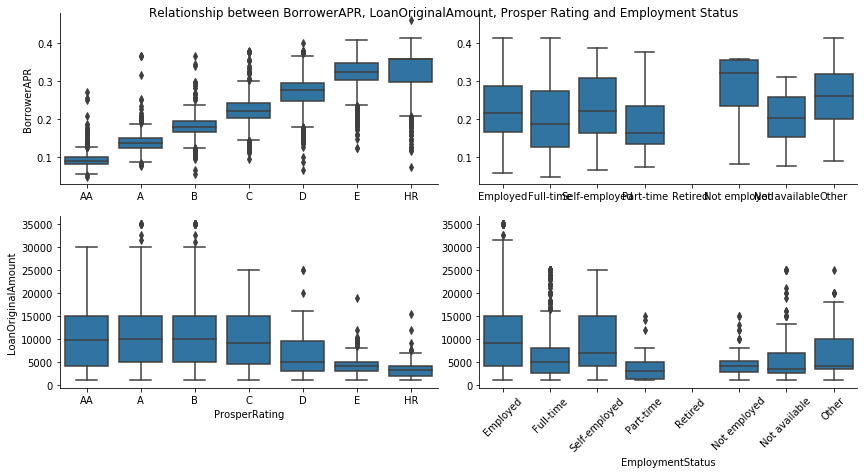

In [8]:
#plot matrix of numerical against categorical variables.

#we'll use the sample 7000 loans 
sample_loans = df_sub.sample(n=7000, replace = False)
def boxplots(x, y, **kwargs):
    '''A function to create box plots with seaborn's PairGrid. '''
    base_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=base_color);

plt.figure(figsize = [20, 15]);
g = sb.PairGrid(data = sample_loans, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], x_vars = categoric_vars, size = 3, aspect = 2, )
plt.xticks(rotation=45)
plt.suptitle('Relationship between BorrowerAPR, LoanOriginalAmount, Prosper Rating and Employment Status');
g.map(boxplots);



## Effect of Prosper Rating on Borrower's APR and Loan Original Amounts

Borrowers with High Risk Rating get low loan amounts but it's interesting how with this same category, the Borrower APR increases with an increase in Loan Amounts.


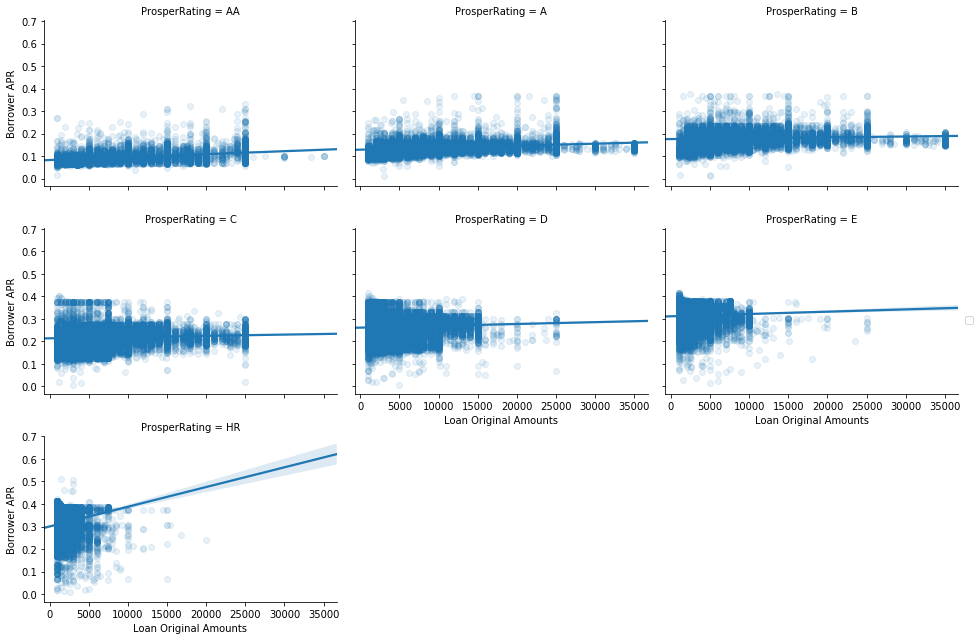

In [9]:
#effect of Prosper Rating on APR and Loan Original Amounts

g=sb.FacetGrid(data=df_sub, col = 'ProsperRating', col_wrap=3, size=3, aspect=1.5)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=1/25, scatter_kws={'alpha':0.1});
g.add_legend();
g.set_xlabels('Loan Original Amounts')
g.set_ylabels('Borrower APR')

plt.show();


## Association between Prosper Rating, Loan Original Amount and Loan Status

Loans given to borrowers with a good Prosper Rating are completed even when the loan amounts are bigger. An interesting observation here is that some borrowers with A and C Prosper Ratings (considered to be good ratings) and very low loan amounts below 2500 have their loans overdue. I didn't expect to have such cases.

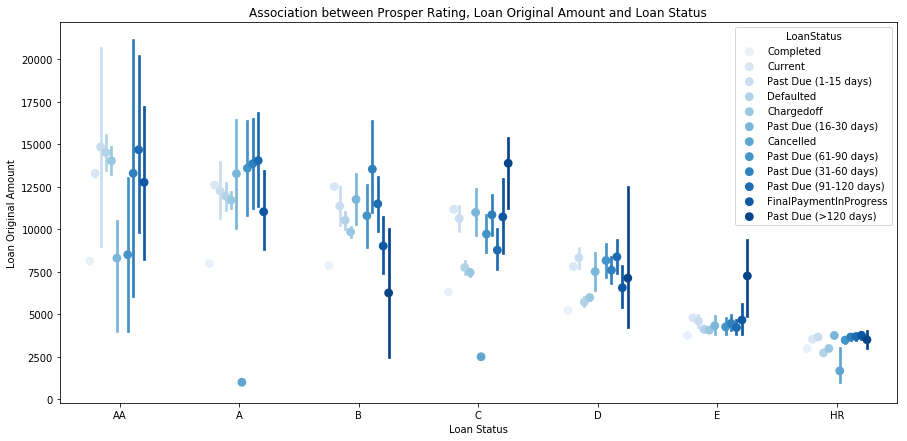

In [10]:
#to show the association between Prosper Rating, Loan Original Amount and Loan Status
plt.figure(figsize=[15,7])
sb.pointplot(data = df_sub, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.5);
plt.ylabel('Loan Original Amount')
plt.xlabel('Loan Status')
plt.title('Association between Prosper Rating, Loan Original Amount and Loan Status')
plt.show();

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Prosper_Loans_Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Prosper_Loans_Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 588036 bytes to Prosper_Loans_Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Prosper_Loans_Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: